# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [220]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [222]:
datapath = "~/teigen_data/output_rows.csv"

In [223]:
plotkw ={
    "figsize": [9, 6], 
    "fontsize": 14, 
}
plot_title_size = 40
plot_linewidth = 3

plot_boxprops = {
    "linewidth": plot_linewidth
}
boxplotkw = {
    "figsize": [9, 6], 
    "fontsize": 14, 
    "boxprops": plot_boxprops,
    "medianprops": plot_boxprops,
    "whiskerprops": plot_boxprops,
    "capprops": plot_boxprops,
    
}



In [224]:
available_radius_methods = [
    "inscribed", "circumscribed", 
    "average",
    "cylinder volume", 
    "cylinder volume + sphere error",
    "cylinder volume + sphere error + man",
    "cylinder volume + sphere error + join error",
    "cylinder surface", 
    "cylinder surface + sphere error",
    "cylinder surface + sphere error + join error",
    "cylinder surface + sphere error + join error man",
    "best",
    
]

In [225]:
%run paramtools.ipynb

Populating the interactive namespace from numpy and matplotlib


In [226]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'appearance noise_preview', u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'area volume [mm^3]',
       u'areasampling areasize_mm', u'areasampling areasize_px',
       u'areasampling voxelsize_mm', u'count []', u'datetime', u'filepattern',
       u'generator_id', u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes random_generator_seed',
       u'generators Continuous tubes uniform_radius_distribution',
       u'generators Gensei n_objects',
       u'generators Unconnected tubes allow_overlap',
       u'gene

In [272]:
pd.to_datetime(df["step1_init_datetime"]) > pd.to_datetime("2017-07-05")

ValueError: Unknown string format

In [277]:
import dateutil
import datetime
str(datetime.datetime.now())

'2017-07-09 11:09:39.733208'

In [271]:
pd.to_datetime("2017-07-05")

Timestamp('2017-07-05 00:00:00')

In [274]:
df["step1_init_datetime"][0]

'[datetime.datetime(2017, 7, 7, 22, 45, 25, 412313)]'

In [227]:
df

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,step1_total_time_s,step2_generate_volume_time_s,step2_init_datetime,step2_numeric_measurement_time_s,step2_save_volume_time_s,step2_total_time_s,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[7.842284],NaN,NaN,NaN,NaN,NaN,7382.742736,0.006712,57072.266540,0.051884
1,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.936808],[0.010708],"[datetime.datetime(2017, 7, 7, 22, 45, 42, 508...",[0.355119],[6.050701],[6.416528],7147.123287,0.006497,54716.072050,0.049742
2,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.980019],[0.00872],"[datetime.datetime(2017, 7, 7, 22, 45, 44, 570...",[0.0387],[0.851207],[0.898627],7500.552460,0.006819,58250.363785,0.052955
3,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[1.012844],[0.009053],"[datetime.datetime(2017, 7, 7, 22, 45, 46, 762...",[0.03032],[0.969843],[1.009216],7382.742736,0.006712,57072.266540,0.051884
4,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.978261],[0.011444],"[datetime.datetime(2017, 7, 7, 22, 45, 48, 914...",[0.063964],[0.882784],[0.958192],7147.123287,0.006497,54716.072050,0.049742
5,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[1.08829],[0.012525],"[datetime.datetime(2017, 7, 7, 22, 45, 50, 970...",[0.061336],[0.789664],[0.863525],7500.552460,0.006819,58250.363785,0.052955
6,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[1.044999],[0.01191],"[datetime.datetime(2017, 7, 7, 22, 45, 53, 122...",[0.050525],[0.871363],[0.933798],7382.742736,0.006712,57072.266540,0.051884
7,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.908028],[0.009471],"[datetime.datetime(2017, 7, 7, 22, 45, 55, 442...",[0.016201],[0.841194],[0.866866],7147.123287,0.006497,54716.072050,0.049742
8,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[4.950186],[0.009594],"[datetime.datetime(2017, 7, 7, 22, 45, 57, 350...",[0.0165],[0.757212],[0.783306],7500.552460,0.006819,58250.363785,0.052955
9,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",1.0,"[datetime.datetime(2017, 7, 7, 22, 45, 25, 220...",~/teigen_data/{seriesn:03d}/data{:06d}.jpg,...,[0.562692],[0.010138],"[datetime.datetime(2017, 7, 7, 22, 46, 3, 9907...",[0.393084],[0.827221],[1.230443],8168.140899,0.007426,64926.248174,0.059024


In [228]:

df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]


# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [229]:

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [230]:

#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))


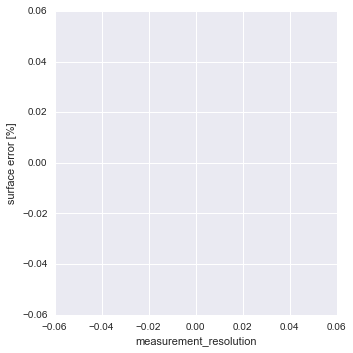

In [231]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [232]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [233]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)


In [234]:
import seaborn as sns

In [235]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [236]:
pd.__version__

u'0.20.1'

In [237]:
## element_number = 10, 
df["output note"]

0      compensation method 1 tube cylinder volume + s...
1      compensation method 1 tube cylinder volume + s...
2      compensation method 1 tube cylinder volume + s...
3      compensation method 1 tube cylinder surface + ...
4      compensation method 1 tube cylinder surface + ...
5      compensation method 1 tube cylinder surface + ...
6      compensation method 1 tube cylinder surface + ...
7      compensation method 1 tube cylinder surface + ...
8      compensation method 1 tube cylinder surface + ...
9      compensation method 1 tube cylinder volume + s...
10     compensation method 1 tube cylinder volume + s...
11     compensation method 1 tube cylinder volume + s...
12     compensation method 1 tube cylinder surface + ...
13     compensation method 1 tube cylinder surface + ...
14     compensation method 1 tube cylinder surface + ...
15     compensation method 1 tube cylinder surface + ...
16     compensation method 1 tube cylinder surface + ...
17     compensation method 1 tu

In [238]:
display("<b>ahoj<b>")

'<b>ahoj<b>'

## Compensation methods

### 1 sphere

In [239]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method 1 sphere " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    #print dfs.keys()
    #display(dfs[["surface [mm^2]", "numeric surface [mm^2]"]])
    show_error(dfs, radius_method=radius_method, plotkw=plotkw)
    


### 1 tube

inscribed 63 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=5.1632482860791271e-12) 
SpearmanrResult(correlation=0.95601466498019816, pvalue=3.4207748777944556e-34) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=5.1632482860791271e-12) 
SpearmanrResult(correlation=0.95601466498019816, pvalue=3.4207748777944556e-34) 

cylinder volume + sphere error 103 :
volume (w/s): 
WilcoxonResult(statistic=1211.0, pvalue=1.3896242647706809e-06) 
SpearmanrResult(correlation=0.98120765906126839, pvalue=5.4673902252807853e-74) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.2434000441081536e-18) 
SpearmanrResult(correlation=0.98120765906126839, pvalue=5.4673902252807853e-74) 

cylinder surface + sphere error 99 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=5.6792120313227731e-18) 
SpearmanrResult(correlation=0.98036020299956694, pvalue=3.3504978178070689e-70) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=5.6792120313227731e-18) 
SpearmanrResult(correlation=0.980360

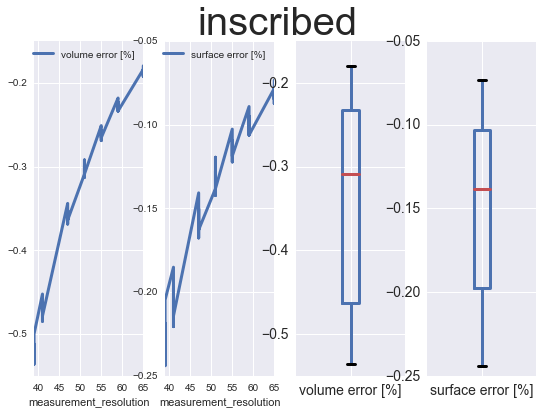

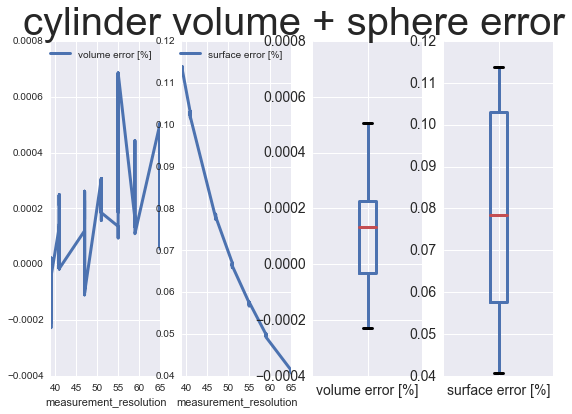

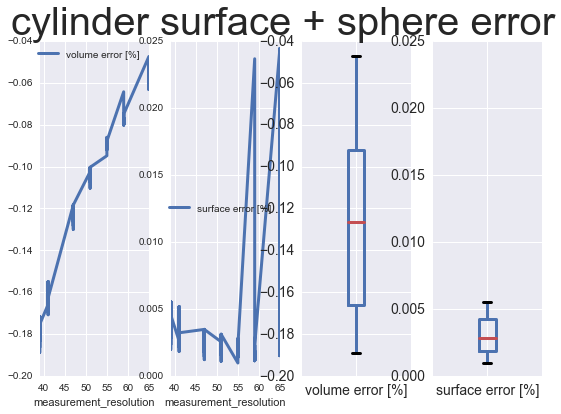

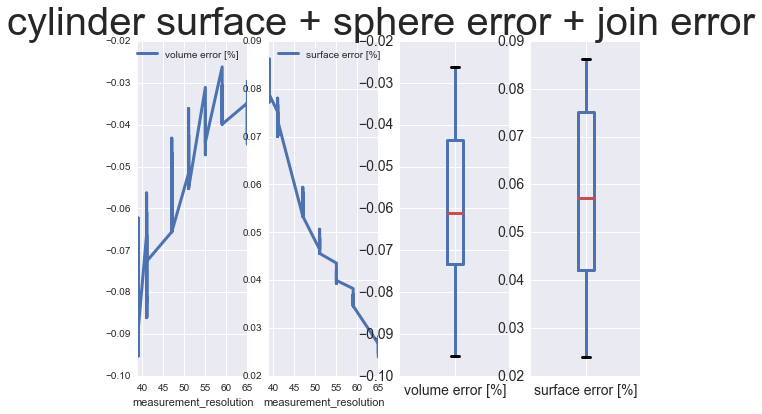

In [240]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df["output note"] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    show_error(dfs, radius_method=radius_method)
    # dfplot(dfs, plotkw, radius_method)


## N tubes

In [241]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df["output note"] == "compensation method N tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = show_error(dfs, radius_method=radius_method)
    


## 5 tubes

In [242]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "compensation method 5 tubes " + radius_method
    ]
    dfsp = show_error(dfs)


In [243]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df["output note"] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfplot(dfs, plotkw, radius_method)


### Mix 

In [244]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "mix " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method)


cylinder volume + sphere error 54 :
volume (w/s): 
WilcoxonResult(statistic=202.0, pvalue=3.2491736332310055e-06) 
SpearmanrResult(correlation=0.99449031619769379, pvalue=1.2855367253002421e-52) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.6172115831675961e-10) 
SpearmanrResult(correlation=0.99449031619769379, pvalue=1.2855367253002421e-52) 

cylinder volume + sphere error + join error 54 :
volume (w/s): 
WilcoxonResult(statistic=620.0, pvalue=0.29147852558366338) 
SpearmanrResult(correlation=0.99449031619769379, pvalue=1.2855367253002421e-52) 
surface (w/s): 
WilcoxonResult(statistic=27.0, pvalue=7.211286980530934e-10) 
SpearmanrResult(correlation=0.99449031619769379, pvalue=1.2855367253002421e-52) 

cylinder surface + sphere error 54 :
volume (w/s): 
WilcoxonResult(statistic=363.0, pvalue=0.0010831549592511731) 
SpearmanrResult(correlation=0.93187425925191303, pvalue=1.4887605952224262e-24) 
surface (w/s): 
WilcoxonResult(statistic=211.0, pvalue=4.7190903088381843e-06) 
Sp

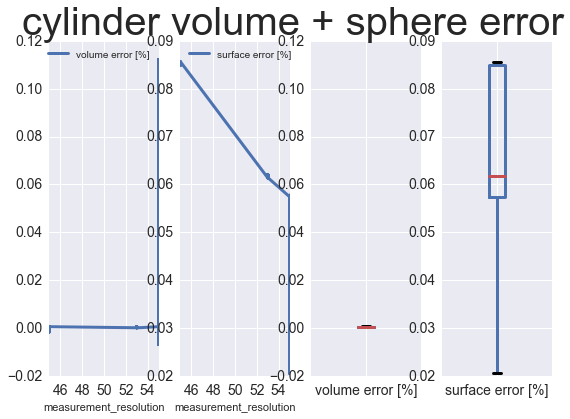

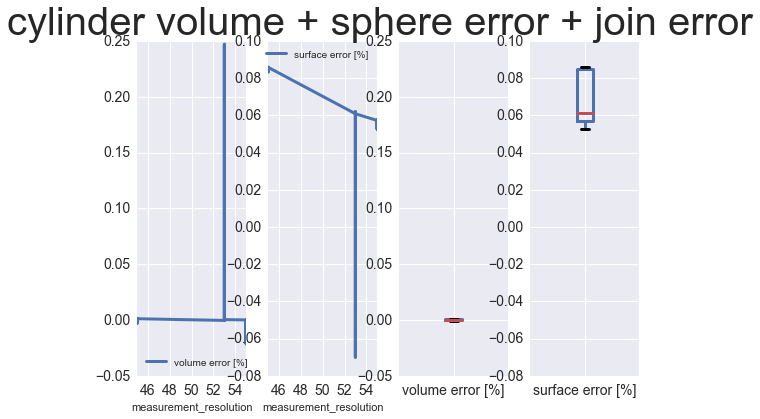

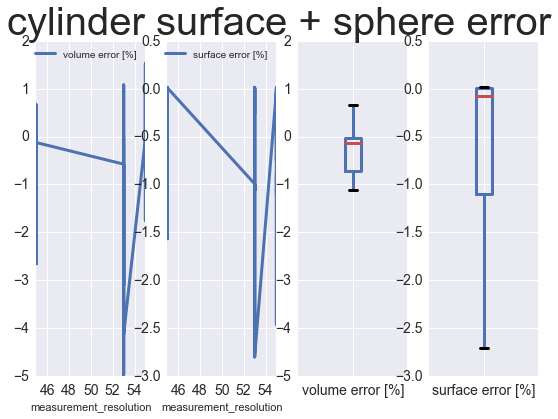

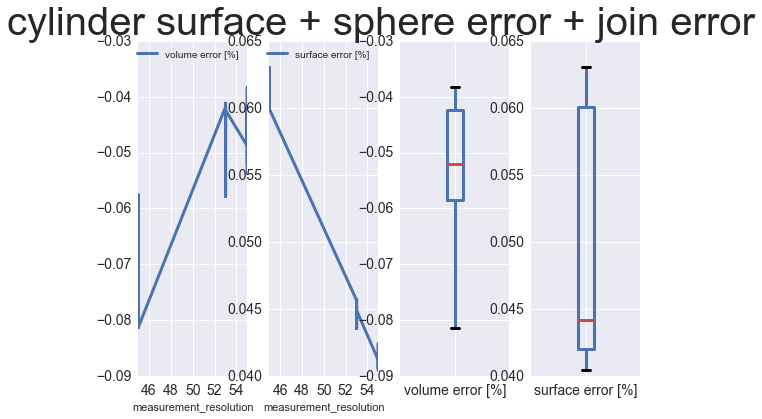

In [245]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] ==  "mix 2 " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method, plotkw=plotkw)


### Radius estimation

In [246]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [247]:
### Kontrolní výpočet objemu

In [248]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [249]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [250]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [251]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["output note"] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]


In [252]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [253]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [254]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [255]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df["output note"] == "compensation method 5 tubes " + radius_method
    ]
    
    dfplot(dfs, plotkw, radius_method)


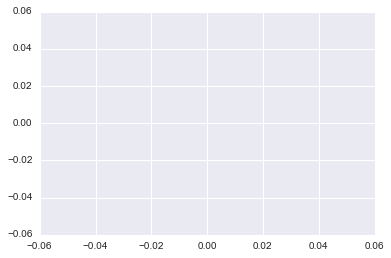

In [256]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [257]:
y.shape

(0,)

In [258]:
x.shape

(0,)

In [259]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

In [260]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    
    "best"]:

        
    dfs = df[
        df["output note"] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)


In [261]:
dfs

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. [],surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean


## Surface

In [262]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [263]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [264]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=nan, pvalue=nan)

## Volume

In [265]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [266]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=nan, pvalue=nan)

# Inscribed to circum

In [267]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [268]:
np.cos(np.pi/2)

6.123233995736766e-17